In [13]:
#1.1 row count

import pandas as pd
import numpy as np
df=pd.read_csv("nyc_noise_complaints.csv")
df.shape

(671145, 36)

In [31]:
#music fraction
count=0
total=df.shape[0]
for music_type in df['descriptor']:
    if 'Music' in music_type:
      count+=1
    
fraction=count/total
print(fraction)

0.6228788115831899


In [126]:
#1.5
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("nycpopulation.csv")
data.head()

,ZIP_CODE,POPULATION
0,1001,16769.0
1,1002,29049.0
2,1003,10372.0
3,1005,5079.0
4,1007,14649.0


In [ ]:
df['created_date'].apply(condition)
df['borough'].apply(cond)
(df.groupby(['status', 'created_date']).count() / df.groupby('status').count())['borough']

In [2]:
prior = df.groupby('status').size().div(len(df)) #count()['Age']/len(data)
print(prior)

status
Assigned       0.000001
Closed         0.959267
In Progress    0.039366
Open           0.000830
Started        0.000510
Unspecified    0.000027
dtype: float64


In [4]:
#1.3 
df['created_date'].unique() #finding unique dates
date=df[(df['created_date'].str.contains('2021'))].index #dropping other values than 2022
df.drop(date , inplace=True)

In [5]:
likelihood = {}
likelihood['borough'] = df.groupby(['status', 'borough']).size().div(len(df)).div(prior)
print(likelihood)

{'borough': status       borough      
Closed       BRONX            0.249767
             BROOKLYN         0.264064
             MANHATTAN        0.264358
             QUEENS           0.201652
             STATEN ISLAND    0.023527
             Unspecified      0.000050
In Progress  BRONX            0.006097
             BROOKLYN         0.042830
             MANHATTAN        0.616627
             QUEENS           0.242127
             STATEN ISLAND    0.000738
Open         BRONX            0.100293
             BROOKLYN         0.366186
             MANHATTAN        0.562108
             QUEENS           0.153938
             STATEN ISLAND    0.041983
Started      BRONX            0.094967
             BROOKLYN         0.592593
             MANHATTAN        0.288699
             QUEENS           0.235518
             STATEN ISLAND    0.053181
Unspecified  BRONX            0.721747
             BROOKLYN         0.216524
             MANHATTAN        0.144349
             QUEENS      

In [11]:
noise=df[df["descriptor"].str.contains('Construction')==False].index
df.drop(noise,inplace=True)
g=df.groupby(['incident_zip','descriptor']).size().unstack(fill_value=0)
g['noise']=g['Noise: Construction Equipment (NC1)'] + g["Noise: Construction Before/After Hours (NM1)"]

g2=g.loc[g["noise"]>100]

print(g2.std())
    

descriptor
Noise: Construction Before/After Hours (NM1)    75.670251
Noise: Construction Equipment (NC1)             31.650538
noise                                           99.253981
dtype: float64


ValueError: x and y must be the same size

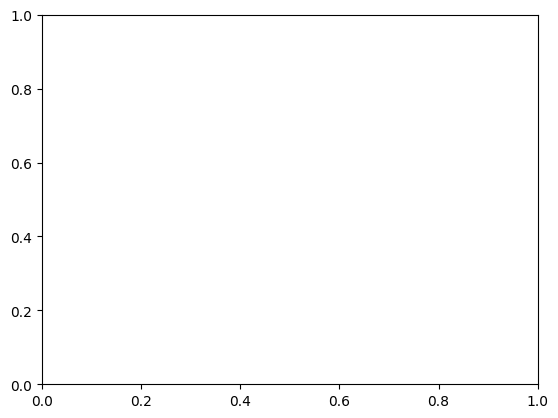

In [94]:
y=df['descriptor'].value_counts()
x1=data['POPULATION']
plt.scatter(x1,y)
 
plt.xlabel('ZIP_CODE', fontsize = 20)
 
plt.ylabel('Complaints', fontsize = 20)
 
plt.show()

ValueError: x and y must be the same size

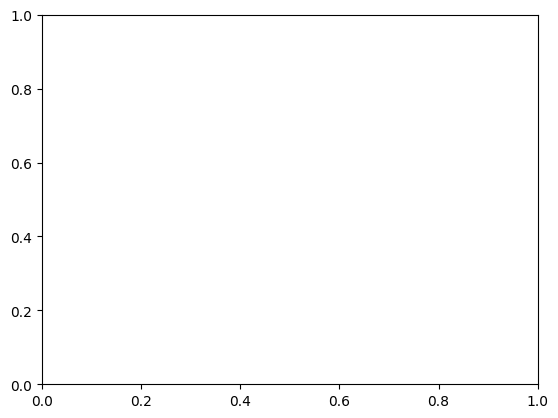

In [23]:
#1.5
df=pd.read_csv("nyc_noise_complaints.csv")
df.shape
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("nycpopulation.csv")
data.head()
count=df.groupby(['incident_zip','descriptor']).size().reset_index(name='count')
count


0      2.0
1      1.0
2      2.0
3     37.0
4      1.0
5      1.0
6      2.0
7      1.0
8    135.0
9    680.0
Name: count, dtype: float64
0    16769.0
1    29049.0
2    10372.0
3     5079.0
4    14649.0
5     1263.0
6      741.0
7     3609.0
8     1370.0
9      661.0
Name: POPULATION, dtype: float64
m = nan 
c = nan


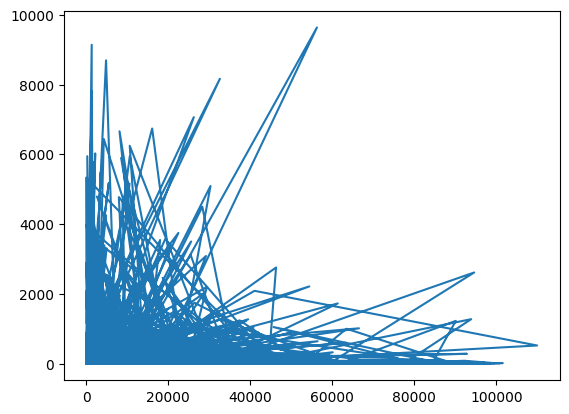

In [25]:
new = pd.concat([count,data['POPULATION']], axis=1)
x=new['POPULATION']
y=new['count']
print(y.head(10))
print(x.head(10))
plt.plot(x,y)

mean_x = np.mean(x)
mean_y = np.mean(y)
m = len(x)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (x[i] - mean_x) * (y[i] - mean_y)
  denom += (x[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

In [32]:
#1.5
df=pd.read_csv("nyc_noise_complaints.csv")
df.shape
data=pd.read_csv("nycpopulation.csv")
data.head()
count=df.groupby(['incident_zip','descriptor']).size().reset_index(name='count')
len(count['count'])


3240